# PROJECT 3: DATA VISUALIZATION CASE STUDY 

## Overview

We are to investigate and come with visuals on the chosen dataset i.e I chose the ford go bike data.
This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


Questions

When are most trips taken in terms of time of day, day of the week?


Which birth year with most riders?


Station with most and least rides?




## Wrangling

>Dropping null values

>convert start_time and end_time to datetime

>convert birth year to int to get ages

## Importing required packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Reading the data**

In [4]:
data = pd.read_csv("201902-fordgobike-tripdata.csv")

Ford GoBike System Data: This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [5]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
data.shape

(183412, 16)

**programmatic assessment**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [8]:
#checking for missing values
data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
#checking for data types
data.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

**Missing Values**

In [10]:
def visualize_null(data,title):
    sns.heatmap(data.isnull(), yticklabels= False, cbar = False, cmap = 'viridis')
    plt.title(title)
    plt.show()

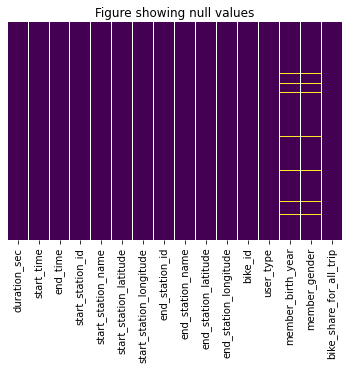

In [11]:
visualize_null(data,'Figure showing null values')

**Wrangling**

**Removing null values**

In [12]:
#create a copy of the dataset for analysis
df = data.copy()

In [13]:
#removing the null values
df = df.dropna()

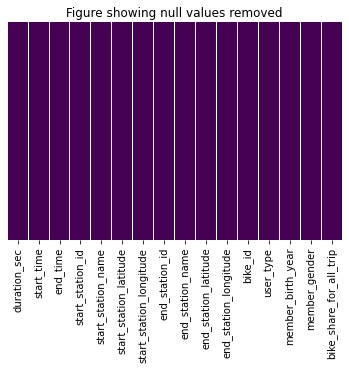

In [14]:
visualize_null(df,'Figure showing null values removed')

In [15]:
#checking if there are still null values
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

**convert start time and end time into datetime**

In [16]:
#conversion of starttime and endtime to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [17]:
#convert member birth year from float to int64
df['member_birth_year'] =df['member_birth_year'].astype('int64')

In [18]:
#checking for changes
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [19]:
#a bit of feature engineering
#creating date features i.e day, week, month, hour from the start and end time.

In [20]:
df['start_week'] = df['start_time'].dt.weekday
df['start_month'] = df['start_time'].dt.month
df['start_day'] = df['start_time'].dt.dayofyear
df['Hour'] = pd.to_datetime(df['start_time']).dt.hour

In [21]:
df['end_week'] = df['end_time'].dt.weekday
df['end_month'] = df['end_time'].dt.month
df['end_day'] = df['end_time'].dt.dayofyear

In [22]:
df['start_day_of_the_week'] = pd.to_datetime(df['start_time']).dt.day_name()
df['start_day_of_the_month'] = pd.to_datetime(df['start_time']).dt.date

In [23]:
df['end_day_of_the_week'] = pd.to_datetime(df['end_time']).dt.day_name()
df['end_day_of_the_month'] = pd.to_datetime(df['end_time']).dt.date

In [24]:
#getting the age
#from the dataset the current year is 2019
df['age'] = 2019 - df['member_birth_year']

**What time of the day are most trips made?**

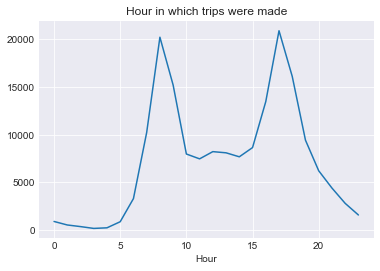

In [59]:
#visualizing the distribution of hour in which trips were made
df.groupby(['Hour']).size().plot()
plt.title('Hour in which trips were made')
plt.show()

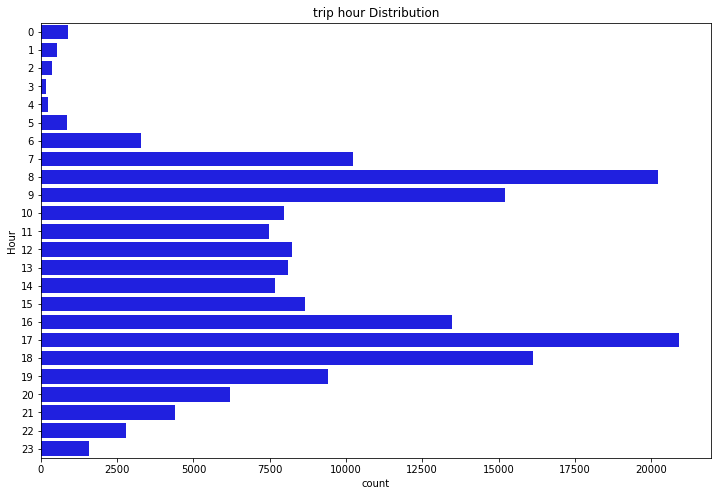

In [26]:
#plotting the day hours distribution to get the specific hour
plt.figure(figsize=(12,8))
sns.countplot( data = df , y = "Hour", color = "blue" )
plt.title('trip hour Distribution');

In [27]:
#keys = [pair for pair, df in df.groupby(['Hour'])]
#plt.plot(keys, df.groupby(['Hour']).count())
#plt.xticks(keys)
#plt.grid()
#plt.show()

8 a.m and 5.00 pm is when most trips are made.

**which day of the week are most trips made?**

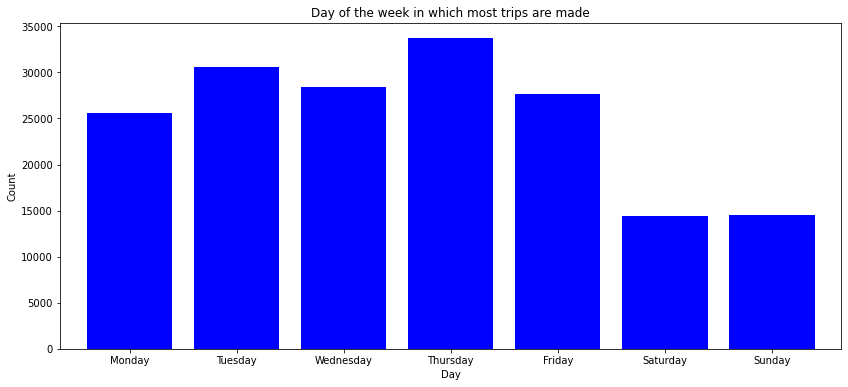

In [28]:
#creating a plot for weekdays and maintaining their natural order
order_of_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df['start_day_of_the_week'].value_counts().reindex(order_of_days).plot(kind='bar',color='blue',figsize=[14,6],rot=0,width=0.8)
plt.title('Day of the week in which most trips are made')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

Most rides are made on Thursdays.

Generally most trips are made on weekdays and few on weekends.

**which day of the month were most trips made?**

In [29]:
#creating a function to visualize any count plot in the analysis to avoid repeating code.
def visualize_count(df,x,title):
    plt.figure(figsize=(14,8))
    sns.countplot(x=x,data=df,order=df[x].value_counts().index)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

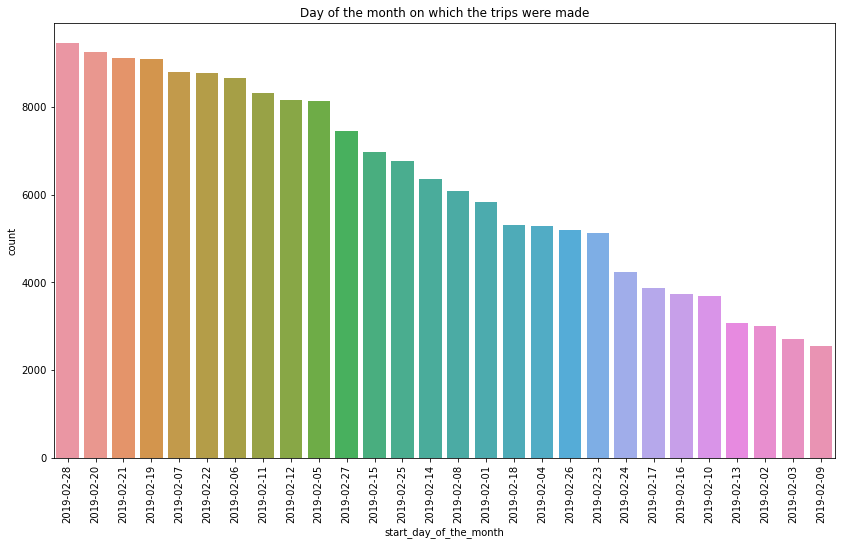

In [30]:
#day of the month with most trips
visualize_count(df,'start_day_of_the_month','Day of the month on which the trips were made')

Most trips were made on 28th february and least on 9th february

**Birth year with most riders**

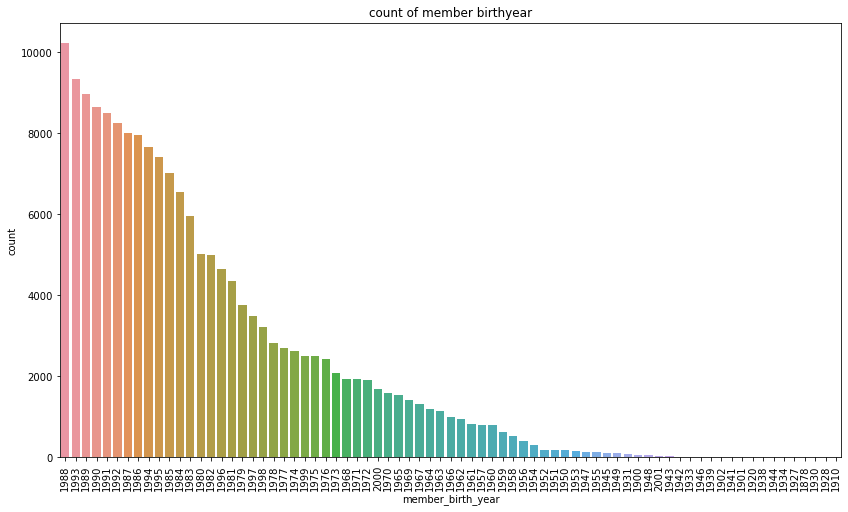

In [31]:
#get the count of birth year using the function 'visualize_count'
visualize_count(df,'member_birth_year','count of member birthyear')

People born in 1988 were most

**violin plots**

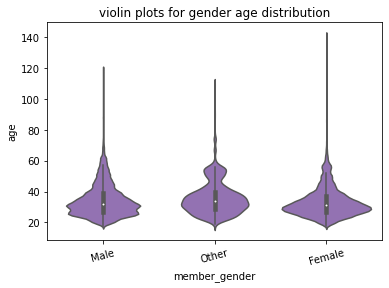

In [32]:
#creating a violin plot to visualize age distribution among the genders
base_color = sns.color_palette()[4]
sns.violinplot(data = df, x = 'member_gender', y = 'age', color = base_color)
plt.xticks(rotation = 15)
plt.title('violin plots for gender age distribution')
plt.show()

**Box plot to visualize outliers**

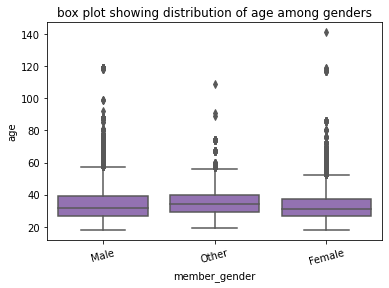

In [33]:
#boxplot similar to violin but allows us to see outliers
def boxplot():
    base_color = sns.color_palette()[4]
    sns.boxplot(data = df, x = 'member_gender', y = 'age', color = base_color)
    plt.title('box plot showing distribution of age among genders')
    plt.xticks(rotation = 15)
    plt.show()
boxplot()

With the outliers we see most riders lie between 20-40.

lets remove them and see the general distribution

In [34]:
# lets remove extreme ages i.e 141, 118...

In [35]:
df.age.unique()

array([ 35,  47,  30,  45,  60,  36,  31,  27,  23,  26,  29,  38,  44,
        41,  28,  22,  33,  19,  37,  24,  39,  46,  34,  48,  40,  52,
        21,  25,  42,  20,  32,  50,  56,  43,  55,  54,  58,  51,  53,
        57,  65,  61,  59,  49,  63,  62,  74, 119,  67,  71,  68,  78,
        69,  70,  66,  64,  73,  72,  88,  76,  77,  99,  86,  18, 141,
       118,  75,  91,  85,  80,  89, 117, 109,  81,  92], dtype=int64)

In [36]:
#removing extremes
df = df[df.age <= 100]
df.age.unique()

array([35, 47, 30, 45, 60, 36, 31, 27, 23, 26, 29, 38, 44, 41, 28, 22, 33,
       19, 37, 24, 39, 46, 34, 48, 40, 52, 21, 25, 42, 20, 32, 50, 56, 43,
       55, 54, 58, 51, 53, 57, 65, 61, 59, 49, 63, 62, 74, 67, 71, 68, 78,
       69, 70, 66, 64, 73, 72, 88, 76, 77, 99, 86, 18, 75, 91, 85, 80, 89,
       81, 92], dtype=int64)

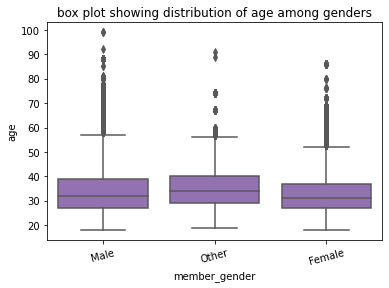

In [37]:
#boxplot with extremes removed
boxplot()

**Histogram for age**

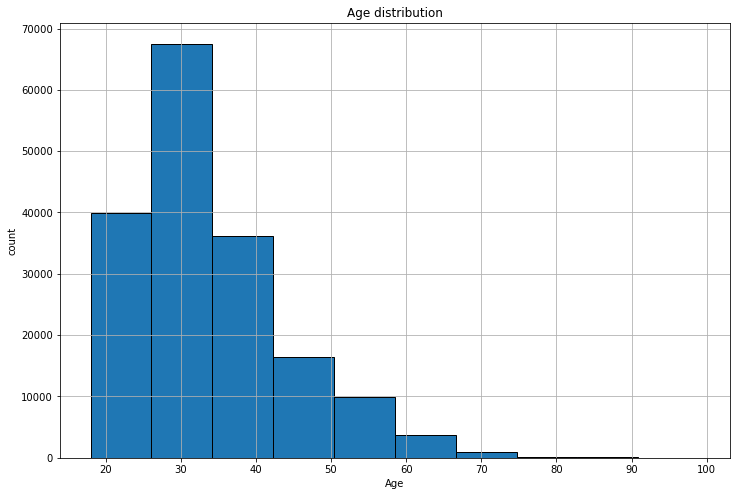

In [38]:
#visualizing the age distribution after removing the etremes
plt.figure(figsize=(12,8))
df['age'].hist(edgecolor='black')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('count');

Most riders are between the age of 20 and 40

In [39]:
#unique values i.e the count for user-type, genders and bike shares
columns = ['user_type','member_gender', 'bike_share_for_all_trip']


for i in columns:
    print(i, '-->')
    print(df[i].value_counts())
    print('----------------------------')

user_type -->
Subscriber    158319
Customer       16561
Name: user_type, dtype: int64
----------------------------
member_gender -->
Male      130443
Female     40791
Other       3646
Name: member_gender, dtype: int64
----------------------------
bike_share_for_all_trip -->
No     157561
Yes     17319
Name: bike_share_for_all_trip, dtype: int64
----------------------------


**Users with most bike riding**

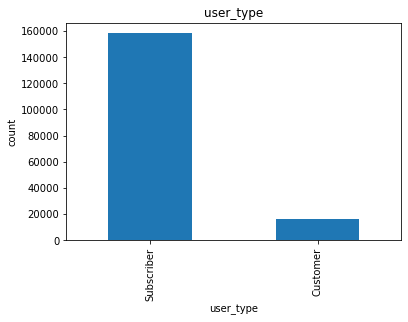

In [40]:
#visualizing count of user type
df['user_type'].value_counts().plot(kind='bar')
plt.title('user_type')
plt.ylabel('count')
plt.xlabel('user_type')
plt.show()

Most bike riding were made by subscribers

**Gender with most bike riding**

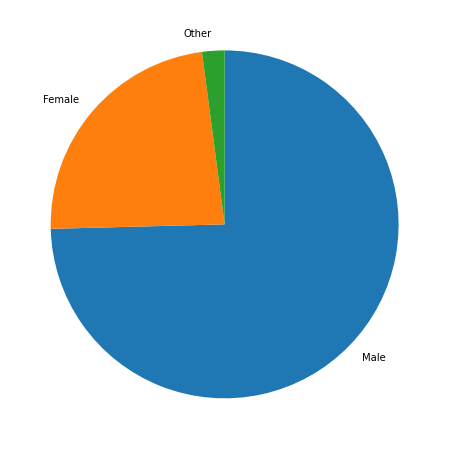

In [41]:
#visulize genders in a pie chart
plt.figure(figsize=(14,8))
sorted_counts = df['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

Males were also the most bike riders

**From the above:**

1) Most bike riding were made by subscribers

2) Males were also the most bike riders

**Stations with most and list riders**

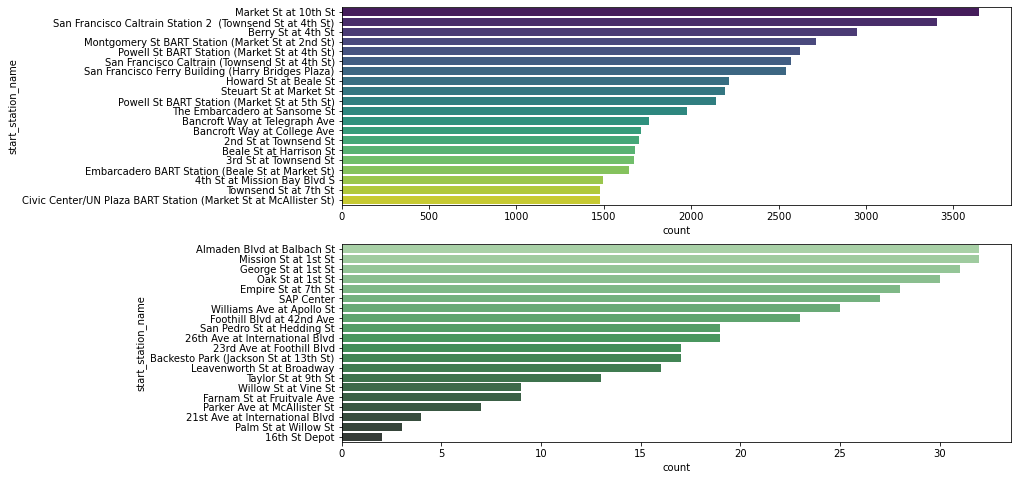

In [42]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
#top 20 stations
sns.countplot(data=df, y="start_station_name", palette='viridis', order=df.start_station_name.value_counts().iloc[:20].index);
plt.subplot(2,1,2)
#least 20 stations
sns.countplot(data=df, y="start_station_name", palette="Greens_d",order=df.start_station_name.value_counts().iloc[-20:].index);

Market st at 10th streets leads with most users.

16th st depot has the least bike riders

**converting the duration in seconds into hours and minutes for more analysis**

In [43]:
#generating features from duration sec column
df['duration_hours'] = df['duration_sec']/3600
df['duration_minutes'] = df['duration_sec']/60

**Analyzing the features**

1) Distribution of Age against time spent in hours

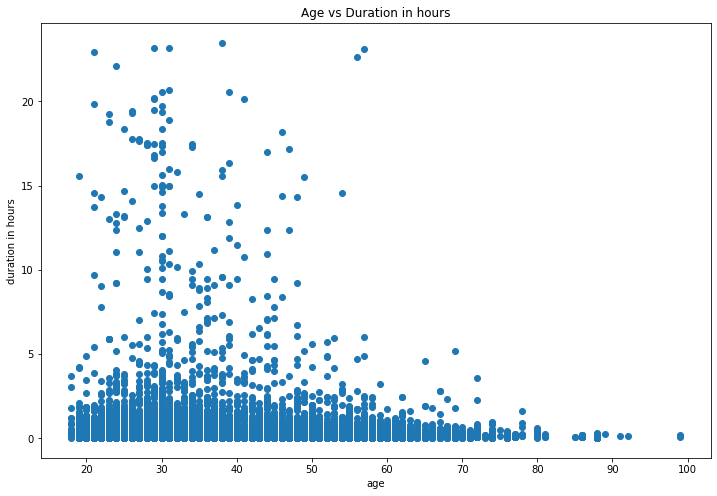

In [44]:
#age v time in hours
plt.figure(figsize=(12,8))
plt.title('Age vs Duration in hours')
plt.scatter(df['age'], df['duration_hours'])
plt.xlabel('age')
plt.ylabel('duration in hours')
plt.show()

Most young people between 20 and 45 years cycle for more hours

2) user_type distribution with regards to age and duration in hours

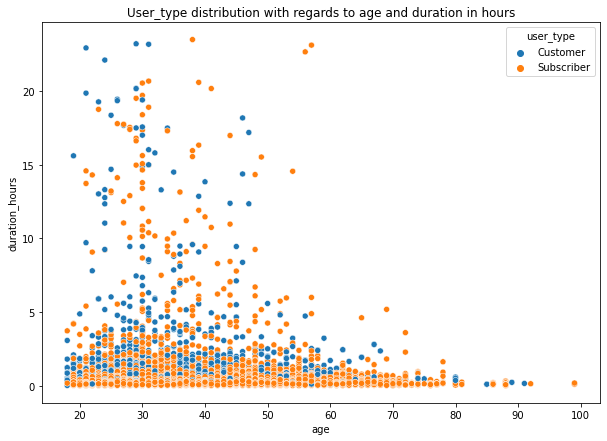

In [45]:
#visualize user_type in terms of age and duration in hours
plt.figure(figsize=(10,7))
sns.scatterplot(x= df.age, y=df.duration_hours , hue=df.user_type)
plt.title('User_type distribution with regards to age and duration in hours')
plt.show()

From the distribution most users spend less than 5 hours

**Age trend for the gender in terms of hour time**

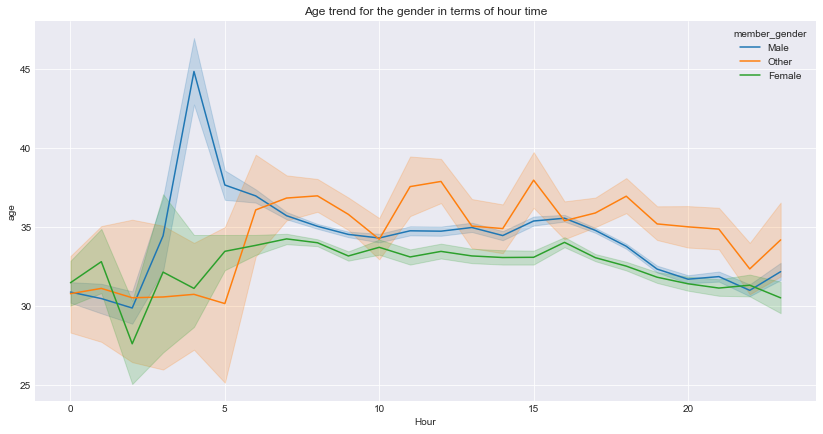

In [57]:
#line plot to get the trend
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')
sns.lineplot(x='Hour',y='age',hue='member_gender',data=df)
plt.title('Age trend for the gender in terms of hour time')
plt.show()

Between the 0 and 5th hour, males aged 30-45 used the bikes more

In [47]:
#creating mask for user_type
df_subscriber = df[df['user_type']=='Subscriber']
df_customer = df[df['user_type']=='Customer']

In [48]:
# creating a function to visualize a mask of two dataframe features
def visualize(data1,data2,label1,label2):
    fig,ax = plt.subplots(figsize=(8,6))
    bins = np.arange((data1.min()//10)*10, data1.max()+5, 5)
    
    ax.hist(data1,alpha=0.5,label = label1,edgecolor='black',bins = bins)
    ax.hist(data2,alpha=0.5,label = label2,edgecolor='black',bins = bins)
    ax.set_xlabel('Age')
    ax.set_ylabel('count')
    ax.legend(loc='upper right')
    plt.title(f"Distribution of {data1.name}: {label1} & {label2}".title())
    plt.show()   

**visualizing distribution age of customers and subscribers**

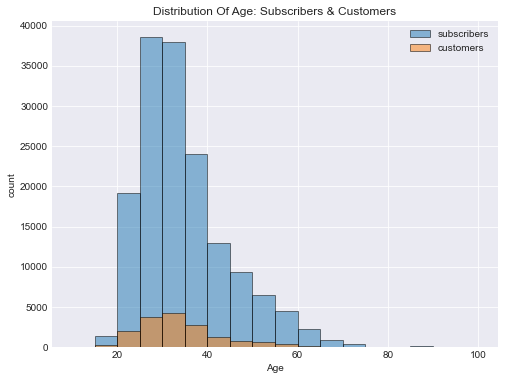

In [49]:
#visualizing distribution age of customers and subscribers
visualize(df_subscriber['age'],df_customer['age'],'subscribers','customers')

From the visual most of the subscribers and customers lie between 20 and 40 age bracket

In [50]:
#creating a mask for male and a female
df_male = df[df['member_gender']=='Male']
df_female = df[df['member_gender']=='Female']

**visualizing age count of male and females**

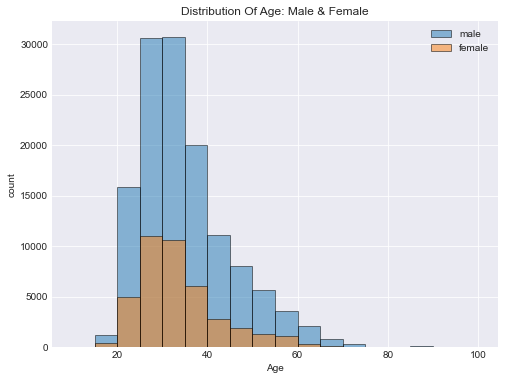

In [51]:
#visualizing age count of male and females
visualize(df_male['age'],df_female['age'],'male','female')

Also from the distribution generally most male and females lie between 20 and 40 years 

**Heatmap for count of usertype and gender.**

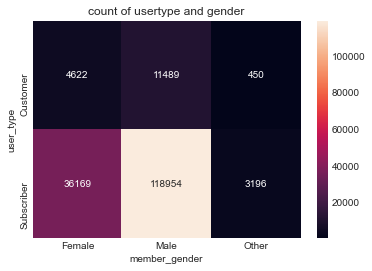

In [52]:
#heatmap
ct_counts = df.groupby(['user_type','member_gender']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'user_type', columns = 'member_gender',values = 'count')
sns.heatmap(ct_counts, annot = True, fmt='d')
plt.title('count of usertype and gender');

**Intepretation:**

From the above plot we have:
    
    1) 36169 female subscribers
    2) 118954 male subscribers
    3) 3196 other gender subscribers

    4) 4622 female customers
    5) 11489 male customers
    6) 450 other gender customers

**Distribution count of gender user type**

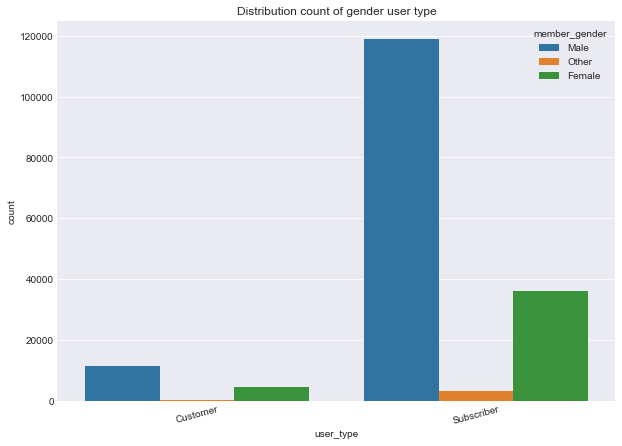

In [58]:
#counting gender in usertype
plt.figure(figsize = (10,7))
sns.countplot(data=df, x= 'user_type', hue ='member_gender')
plt.title('Distribution count of gender user type')
plt.xticks(rotation=15);

From the visual more males are enrolled to the bike sharing system.

**correlation heatmap**

lets take hour, duration_minutes, age

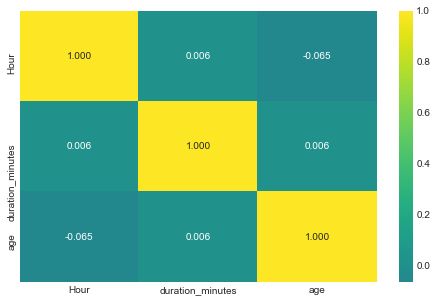

In [54]:
#correlation heatmap
columns = ['Hour','duration_minutes','age']
plt.figure(figsize = [8, 5])
sns.heatmap(df[columns].corr(), annot = True, fmt = '.3f',cmap = 'viridis', center = 0)
plt.show()

From the heatmap the correlation is weak between age, duration_minutes and hour. They are close to zero.

**Trip duration for the users**

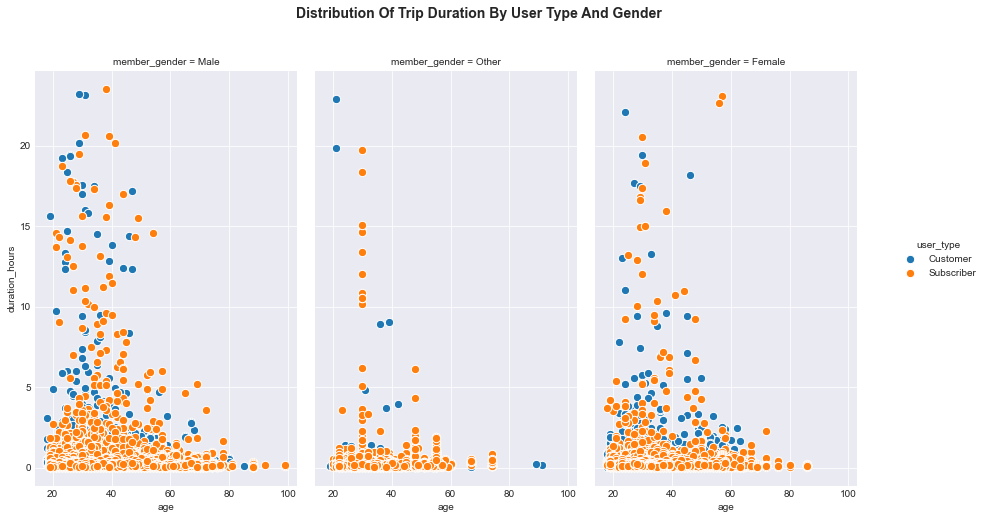

In [55]:
#visualizing the distribution of trip duration by user Type and gender
g = sns.FacetGrid(df, col="member_gender" , hue="user_type" ,height=3, aspect=1)
g = g.map(plt.scatter, "age" , "duration_hours" , edgecolor="w", s=70)
plt.suptitle("Distribution of trip duration by user Type and gender".title(),y=1,fontsize =14, weight='bold')
g.add_legend()
g.fig.set_size_inches(14,8);

Again here more users take less than 5 hrs

**Users trend**

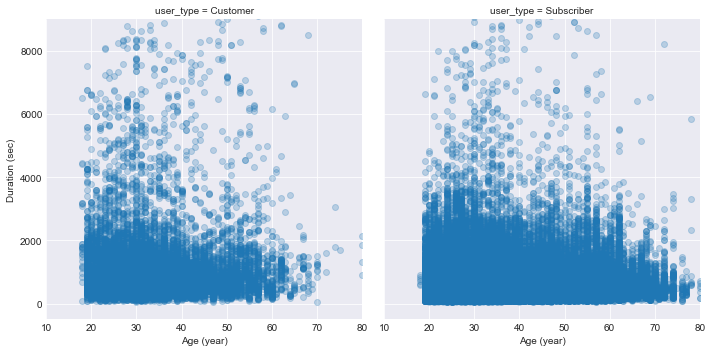

In [56]:
#visualizing the trend of the usertypes using facet grid
user_types = sns.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
user_types.map(plt.scatter, 'age', 'duration_sec', alpha=0.25)
user_types.set_xlabels('Age (year)')
user_types.set_ylabels('Duration (sec)')

plt.show()

Here both the customer and subcriber show similar trend

# CONCLUSION

### Talk about some of the observations.

Most trips during the day were made at 8.00 am and 5.00pm this shows that most usere were workers and the bikes were used in rush hours

Most males used bikes as compared to other genders

Subscribers were more as compared to customers

### Were there any interesting or surprising interactions between features?

Not much, most observations were as expected:

>Most young people cycling for more hours with an exception of few aged individuals

> Subscribers were more as compared to customers

# THANK YOU